In [3]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
rain_data = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(process)/data강수량.csv", encoding="utf8")
humid_data = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(process)/data습도.csv", encoding="utf8")
temperature_data = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(process)/data평균기온.csv", encoding="utf8")
wind_data = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(process)/data풍속.csv", encoding="utf8")

amount_produced = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(process)/대파_노지_시설_생산량_2001-2019.csv", encoding="utf8")
harvest_data1 = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(process)/대파_노지_재배면적_2002-2019.csv", encoding="utf8")
income_data = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(process)/대파_수입량_2002-2019.csv", encoding='utf8')
harvest_data2 = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(process)/대파_시설_재배면적_2006-2019.csv", encoding="utf8")
oil_data = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(process)/유가_2000-2019.csv", encoding='utf8')
minimum_wage_data = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(process)/최저임금_2000-2019.csv", encoding='utf8', thousands=",")

In [6]:
display(rain_data, humid_data, temperature_data, wind_data)

,지역별,년,월,평균월강수량,최다월강수량
0,서울특별시,2000,1,46.9,57.7
1,부산광역시,2000,1,19.3,36.5
2,대구광역시,2000,1,36.5,143.1
3,인천광역시,2000,1,46.9,57.7
4,광주광역시,2000,1,26.2,33.7
...,...,...,...,...,...
4075,전라북도,2019,12,33.2,38.5
4076,전라남도,2019,12,34.2,41.5
4077,경상북도,2019,12,21.0,68.2
4078,경상남도,2019,12,37.1,50.3


,지역별,년,월,평균습도,최저습도
0,서울특별시,2000,1,67,20
1,부산광역시,2000,1,56,12
2,대구광역시,2000,1,60,11
3,인천광역시,2000,1,67,20
4,광주광역시,2000,1,63,12
...,...,...,...,...,...
4075,전라북도,2019,12,71,11
4076,전라남도,2019,12,67,6
4077,경상북도,2019,12,61,8
4078,경상남도,2019,12,61,9


,지역별,년,월,평균기온,최저기온,최고기온
0,서울특별시,2000,1,-2.3,-6.1,1.6
1,부산광역시,2000,1,1.7,-3.0,7.2
2,대구광역시,2000,1,0.3,-4.2,5.1
3,인천광역시,2000,1,-2.3,-6.1,1.6
4,광주광역시,2000,1,2.1,-1.6,5.9
...,...,...,...,...,...,...
4075,전라북도,2019,12,2.8,-1.7,8.0
4076,전라남도,2019,12,4.8,0.4,9.5
4077,경상북도,2019,12,2.4,-2.4,8.4
4078,경상남도,2019,12,4.3,-0.4,10.2


,지역별,년,월,평균풍속,최대풍속
0,서울특별시,2000,1,2.5,13.2
1,부산광역시,2000,1,1.7,13.0
2,대구광역시,2000,1,2.5,14.0
3,인천광역시,2000,1,2.5,13.2
4,광주광역시,2000,1,4.0,18.8
...,...,...,...,...,...
4075,전라북도,2019,12,1.4,10.8
4076,전라남도,2019,12,2.4,18.5
4077,경상북도,2019,12,1.9,16.4
4078,경상남도,2019,12,1.5,10.4


In [7]:
oil_data['시도별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주',
       '세종특별자치시'], dtype=object)

In [8]:
oil_data = oil_data.replace("제주", "제주도")
oil_data['시도별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주도', '세종특별자치시'], dtype=object)

In [9]:
amount_produced['시도별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주도'], dtype=object)

In [10]:
display(amount_produced, harvest_data1, harvest_data2, income_data, oil_data, minimum_wage_data)

,Unnamed: 0,시도별,년,월,총생산량,노지_생산량,시설_생산량
0,0,서울특별시,2001,1,289.0,201.0,88.0
1,1,부산광역시,2001,1,995.0,908.0,87.0
2,2,대구광역시,2001,1,430.0,387.0,43.0
3,3,인천광역시,2001,1,361.0,323.0,38.0
4,4,광주광역시,2001,1,73.0,68.0,5.0
...,...,...,...,...,...,...,...
3871,12,전라북도,2019,12,915.0,682.0,233.0
3872,13,전라남도,2019,12,3741.0,3713.0,29.0
3873,14,경상북도,2019,12,795.0,658.0,137.0
3874,15,경상남도,2019,12,765.0,451.0,314.0


,Unnamed: 0,시도별,년,월,재배면적합계,논_재배면적,밭_재배면적
0,0,서울특별시,2002,1,158.0,2.0,156.0
1,1,부산광역시,2002,1,839.0,108.0,731.0
2,2,대구광역시,2002,1,318.0,11.0,307.0
3,3,인천광역시,2002,1,349.0,6.0,343.0
4,4,광주광역시,2002,1,22.0,0.0,22.0
...,...,...,...,...,...,...,...
3667,12,전라북도,2019,12,682.0,173.0,509.0
3668,13,전라남도,2019,12,3713.0,81.0,3632.0
3669,14,경상북도,2019,12,658.0,89.0,569.0
3670,15,경상남도,2019,12,451.0,275.0,176.0


,Unnamed: 0,시도별,년,월,시설재배면적합계,시설_논_재배면적,시설_밭_재배면적
0,0,서울특별시,2006,1,20.0,0.0,20.0
1,1,부산광역시,2006,1,40.0,32.0,8.0
2,2,대구광역시,2006,1,32.0,7.0,25.0
3,3,인천광역시,2006,1,21.0,1.0,20.0
4,4,광주광역시,2006,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2851,12,전라북도,2019,12,233.0,35.0,198.0
2852,13,전라남도,2019,12,29.0,0.0,29.0
2853,14,경상북도,2019,12,137.0,1.0,136.0
2854,15,경상남도,2019,12,314.0,138.0,176.0


,Unnamed: 0,시도별,년,월,주산물수량,농가수취가격,총수입량
0,0,서울특별시,2002,1,3279,762,2498598
1,1,부산광역시,2002,1,3279,762,2498598
2,2,대구광역시,2002,1,3279,762,2498598
3,3,인천광역시,2002,1,3279,762,2498598
4,4,광주광역시,2002,1,3279,762,2498598
...,...,...,...,...,...,...,...
3667,3667,전라북도,2019,12,3312,855,2831760
3668,3668,전라남도,2019,12,3312,855,2831760
3669,3669,경상북도,2019,12,3312,855,2831760
3670,3670,경상남도,2019,12,3312,855,2831760


,Unnamed: 0,시도별,년,월,유가
0,0,서울특별시,2000,1,1228.97
1,1,부산광역시,2000,1,1212.20
2,2,대구광역시,2000,1,1201.29
3,3,인천광역시,2000,1,1225.15
4,4,광주광역시,2000,1,1216.67
...,...,...,...,...,...
4075,4075,전라남도,2019,12,1535.63
4076,4076,경상북도,2019,12,1531.29
4077,4077,경상남도,2019,12,1527.44
4078,4078,제주도,2019,12,1610.68


,Unnamed: 0,시도별,년,월,최저임금
0,0,서울특별시,2000,1,1600
1,1,부산광역시,2000,1,1600
2,2,대구광역시,2000,1,1600
3,3,인천광역시,2000,1,1600
4,4,광주광역시,2000,1,1600
...,...,...,...,...,...
4075,4075,전라북도,2019,12,8350
4076,4076,전라남도,2019,12,8350
4077,4077,경상북도,2019,12,8350
4078,4078,경상남도,2019,12,8350


In [11]:
amount_produced = amount_produced.iloc[1020:,1:]
harvest_data1 = harvest_data1.iloc[816:,1:]
income_data = income_data.iloc[816:,1:]
oil_data = oil_data.iloc[1224:,1:]
minimum_wage_data = minimum_wage_data.iloc[1224:,1:]
harvest_data2 = harvest_data2.iloc[:,1:]

In [12]:
all_data = pd.merge(left = rain_data, right=humid_data, how="outer", on=["지역별", '년', '월'])
all_data = pd.merge(left = all_data, right=temperature_data, how="outer", on=["지역별", '년', '월'])
all_data = pd.merge(left = all_data, right=wind_data, how="outer", on=["지역별", '년', '월'])
all_data

,지역별,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,평균풍속,최대풍속
0,서울특별시,2000,1,46.9,57.7,67,20,-2.3,-6.1,1.6,2.5,13.2
1,부산광역시,2000,1,19.3,36.5,56,12,1.7,-3.0,7.2,1.7,13.0
2,대구광역시,2000,1,36.5,143.1,60,11,0.3,-4.2,5.1,2.5,14.0
3,인천광역시,2000,1,46.9,57.7,67,20,-2.3,-6.1,1.6,2.5,13.2
4,광주광역시,2000,1,26.2,33.7,63,12,2.1,-1.6,5.9,4.0,18.8
...,...,...,...,...,...,...,...,...,...,...,...,...
4075,전라북도,2019,12,33.2,38.5,71,11,2.8,-1.7,8.0,1.4,10.8
4076,전라남도,2019,12,34.2,41.5,67,6,4.8,0.4,9.5,2.4,18.5
4077,경상북도,2019,12,21.0,68.2,61,8,2.4,-2.4,8.4,1.9,16.4
4078,경상남도,2019,12,37.1,50.3,61,9,4.3,-0.4,10.2,1.5,10.4


In [13]:
all_data2 = pd.merge(left = amount_produced, right=harvest_data1, how="outer", on=["시도별", '년', '월'])
all_data2 = pd.merge(left = all_data2, right=harvest_data2, how="outer", on=["시도별", '년', '월'])
all_data2 = pd.merge(left = all_data2, right=income_data, how="outer", on=["시도별", '년', '월'])
all_data2 = pd.merge(left = all_data2, right=oil_data, how="outer", on=["시도별", '년', '월'])
all_data2 = pd.merge(left = all_data2, right=minimum_wage_data, how="outer", on=["시도별", '년', '월'])
all_data2

,시도별,년,월,총생산량,노지_생산량,시설_생산량,재배면적합계,논_재배면적,밭_재배면적,시설재배면적합계,시설_논_재배면적,시설_밭_재배면적,주산물수량,농가수취가격,총수입량,유가,최저임금
0,서울특별시,2006,1,185.0,165.0,20.0,165.0,2.0,163.0,20.0,0.0,20.0,3249,761,2472489,1520.26,3100
1,부산광역시,2006,1,976.0,936.0,40.0,936.0,362.0,574.0,40.0,32.0,8.0,3249,761,2472489,1478.33,3100
2,대구광역시,2006,1,164.0,132.0,32.0,132.0,7.0,125.0,32.0,7.0,25.0,3249,761,2472489,1458.98,3100
3,인천광역시,2006,1,268.0,247.0,21.0,247.0,35.0,212.0,21.0,1.0,20.0,3249,761,2472489,1479.58,3100
4,광주광역시,2006,1,7.0,7.0,0.0,7.0,2.0,5.0,0.0,0.0,0.0,3249,761,2472489,1463.57,3100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,전라북도,2019,12,915.0,682.0,233.0,682.0,173.0,509.0,233.0,35.0,198.0,3312,855,2831760,1543.96,8350
2852,전라남도,2019,12,3741.0,3713.0,29.0,3713.0,81.0,3632.0,29.0,0.0,29.0,3312,855,2831760,1535.63,8350
2853,경상북도,2019,12,795.0,658.0,137.0,658.0,89.0,569.0,137.0,1.0,136.0,3312,855,2831760,1531.29,8350
2854,경상남도,2019,12,765.0,451.0,314.0,451.0,275.0,176.0,314.0,138.0,176.0,3312,855,2831760,1527.44,8350


In [14]:
all_data = all_data.iloc[1224:,:]

In [15]:
all_data = all_data.rename(columns={"지역별":"시도별"})
all_data 

,시도별,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,평균풍속,최대풍속
1224,서울특별시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,1.8,14.8
1225,부산광역시,2006,1,23.8,28.0,55,7,2.1,-2.6,8.0,1.6,10.2
1226,대구광역시,2006,1,38.6,95.7,58,9,0.8,-3.7,6.0,2.3,12.3
1227,인천광역시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,1.8,14.8
1228,광주광역시,2006,1,16.2,23.3,66,7,2.6,-1.3,7.1,3.0,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...
4075,전라북도,2019,12,33.2,38.5,71,11,2.8,-1.7,8.0,1.4,10.8
4076,전라남도,2019,12,34.2,41.5,67,6,4.8,0.4,9.5,2.4,18.5
4077,경상북도,2019,12,21.0,68.2,61,8,2.4,-2.4,8.4,1.9,16.4
4078,경상남도,2019,12,37.1,50.3,61,9,4.3,-0.4,10.2,1.5,10.4


In [16]:
all_data3 = pd.merge(left=all_data, right=all_data2, how="outer", on=["시도별", "년", "월"])
all_data3

,시도별,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,...,논_재배면적,밭_재배면적,시설재배면적합계,시설_논_재배면적,시설_밭_재배면적,주산물수량,농가수취가격,총수입량,유가,최저임금
0,서울특별시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,...,2.0,163.0,20.0,0.0,20.0,3249,761,2472489,1520.26,3100
1,부산광역시,2006,1,23.8,28.0,55,7,2.1,-2.6,8.0,...,362.0,574.0,40.0,32.0,8.0,3249,761,2472489,1478.33,3100
2,대구광역시,2006,1,38.6,95.7,58,9,0.8,-3.7,6.0,...,7.0,125.0,32.0,7.0,25.0,3249,761,2472489,1458.98,3100
3,인천광역시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,...,35.0,212.0,21.0,1.0,20.0,3249,761,2472489,1479.58,3100
4,광주광역시,2006,1,16.2,23.3,66,7,2.6,-1.3,7.1,...,2.0,5.0,0.0,0.0,0.0,3249,761,2472489,1463.57,3100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,전라북도,2019,12,33.2,38.5,71,11,2.8,-1.7,8.0,...,173.0,509.0,233.0,35.0,198.0,3312,855,2831760,1543.96,8350
2852,전라남도,2019,12,34.2,41.5,67,6,4.8,0.4,9.5,...,81.0,3632.0,29.0,0.0,29.0,3312,855,2831760,1535.63,8350
2853,경상북도,2019,12,21.0,68.2,61,8,2.4,-2.4,8.4,...,89.0,569.0,137.0,1.0,136.0,3312,855,2831760,1531.29,8350
2854,경상남도,2019,12,37.1,50.3,61,9,4.3,-0.4,10.2,...,275.0,176.0,314.0,138.0,176.0,3312,855,2831760,1527.44,8350


In [17]:
all_data3["거리"] = 0
all_data3

,시도별,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,...,밭_재배면적,시설재배면적합계,시설_논_재배면적,시설_밭_재배면적,주산물수량,농가수취가격,총수입량,유가,최저임금,거리
0,서울특별시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,...,163.0,20.0,0.0,20.0,3249,761,2472489,1520.26,3100,0
1,부산광역시,2006,1,23.8,28.0,55,7,2.1,-2.6,8.0,...,574.0,40.0,32.0,8.0,3249,761,2472489,1478.33,3100,0
2,대구광역시,2006,1,38.6,95.7,58,9,0.8,-3.7,6.0,...,125.0,32.0,7.0,25.0,3249,761,2472489,1458.98,3100,0
3,인천광역시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,...,212.0,21.0,1.0,20.0,3249,761,2472489,1479.58,3100,0
4,광주광역시,2006,1,16.2,23.3,66,7,2.6,-1.3,7.1,...,5.0,0.0,0.0,0.0,3249,761,2472489,1463.57,3100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,전라북도,2019,12,33.2,38.5,71,11,2.8,-1.7,8.0,...,509.0,233.0,35.0,198.0,3312,855,2831760,1543.96,8350,0
2852,전라남도,2019,12,34.2,41.5,67,6,4.8,0.4,9.5,...,3632.0,29.0,0.0,29.0,3312,855,2831760,1535.63,8350,0
2853,경상북도,2019,12,21.0,68.2,61,8,2.4,-2.4,8.4,...,569.0,137.0,1.0,136.0,3312,855,2831760,1531.29,8350,0
2854,경상남도,2019,12,37.1,50.3,61,9,4.3,-0.4,10.2,...,176.0,314.0,138.0,176.0,3312,855,2831760,1527.44,8350,0


In [18]:
all_data3['시도별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주도'], dtype=object)

In [19]:
all_data3['거리'] = all_data3['거리'].astype(float)

In [20]:
for i, row in all_data3.iterrows():
  if all_data3.iloc[i,0] == '서울특별시':
    all_data3.at[i, "거리"] = 397.0
  elif all_data3.iloc[i,0] == '대구광역시':
    all_data3.at[i, "거리"] = 109.2
  elif all_data3.iloc[i,0] == '인천광역시':
    all_data3.at[i, "거리"] = 408.6
  elif all_data3.iloc[i,0] == '광주광역시':
    all_data3.at[i, "거리"] = 262.2
  elif all_data3.iloc[i,0] == '대전광역시':
    all_data3.at[i, "거리"] = 253.4
  elif all_data3.iloc[i,0] == '울산광역시':
    all_data3.at[i, "거리"] = 58.3
  elif all_data3.iloc[i,0] == '경기도':
    all_data3.at[i, "거리"] = 372.1
  elif all_data3.iloc[i,0] == '강원도':
    all_data3.at[i, "거리"] = 404.0
  elif all_data3.iloc[i,0] == '세종특별자치시':
    all_data3.at[i, "거리"] = 281.1
  elif all_data3.iloc[i,0] == '충청북도':
    all_data3.at[i, "거리"] = 273.1
  elif all_data3.iloc[i,0] == '충청남도':
    all_data3.at[i, "거리"] = 345.6
  elif all_data3.iloc[i,0] == '전라북도':
    all_data3.at[i, "거리"] = 256.3
  elif all_data3.iloc[i,0] == '전라남도':
    all_data3.at[i, "거리"] = 293.6
  elif all_data3.iloc[i,0] == '경상북도':
    all_data3.at[i, "거리"] = 211.8
  elif all_data3.iloc[i,0] == '경상남도':
    all_data3.at[i, "거리"] = 44.6
  elif all_data3.iloc[i,0] == '제주도':
    all_data3.at[i, "거리"] = 328.9
all_data3

,시도별,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,...,밭_재배면적,시설재배면적합계,시설_논_재배면적,시설_밭_재배면적,주산물수량,농가수취가격,총수입량,유가,최저임금,거리
0,서울특별시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,...,163.0,20.0,0.0,20.0,3249,761,2472489,1520.26,3100,397.0
1,부산광역시,2006,1,23.8,28.0,55,7,2.1,-2.6,8.0,...,574.0,40.0,32.0,8.0,3249,761,2472489,1478.33,3100,0.0
2,대구광역시,2006,1,38.6,95.7,58,9,0.8,-3.7,6.0,...,125.0,32.0,7.0,25.0,3249,761,2472489,1458.98,3100,109.2
3,인천광역시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,...,212.0,21.0,1.0,20.0,3249,761,2472489,1479.58,3100,408.6
4,광주광역시,2006,1,16.2,23.3,66,7,2.6,-1.3,7.1,...,5.0,0.0,0.0,0.0,3249,761,2472489,1463.57,3100,262.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,전라북도,2019,12,33.2,38.5,71,11,2.8,-1.7,8.0,...,509.0,233.0,35.0,198.0,3312,855,2831760,1543.96,8350,256.3
2852,전라남도,2019,12,34.2,41.5,67,6,4.8,0.4,9.5,...,3632.0,29.0,0.0,29.0,3312,855,2831760,1535.63,8350,293.6
2853,경상북도,2019,12,21.0,68.2,61,8,2.4,-2.4,8.4,...,569.0,137.0,1.0,136.0,3312,855,2831760,1531.29,8350,211.8
2854,경상남도,2019,12,37.1,50.3,61,9,4.3,-0.4,10.2,...,176.0,314.0,138.0,176.0,3312,855,2831760,1527.44,8350,44.6


In [21]:
#seoul busan daejeon daegu

In [22]:
price_high = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(raw data)/가격/대파가격_상_부산.csv", thousands = ',',encoding='cp949')
price_low = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(raw data)/가격/대파가격_중_부산.csv", thousands = ',', encoding='cp949')
display(price_high, price_low)

,구분,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연평균
0,2000,1336,1252,1200,1139,1079,1268,1325,1446,2261,1825,1496,1160,1396
1,2001,1498,1060,985,875,958,1180,1174,1320,1448,1402,1071,1014,1165
2,2002,1126,1065,1019,975,1009,1075,1071,1504,2662,2138,1628,1656,1411
3,2003,2081,2693,2884,2410,2418,1984,1645,1756,2504,3108,3040,2441,2410
4,2004,2326,2531,2693,2348,1797,1289,1257,1537,2005,1745,1595,1334,1886
5,2005,1321,1322,1300,1232,1208,1248,1372,1505,1650,2007,2082,2300,1553
6,2006,2982,3090,3009,2815,2569,2038,1978,2234,2178,2091,1895,1809,2395
7,2007,1752,1392,1287,1232,1068,1249,1506,1546,2078,2893,3264,3213,1873
8,2008,3037,2954,3189,2410,1710,1748,1561,1542,1688,1662,1620,1772,2070
9,2009,1982,2110,1732,1480,1785,2244,2444,2677,2676,2490,2400,2630,2225


,구분,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연평균
0,2000,1036,976,950,917,879,978,1027,1173,2013,1525,1273,960,1139
1,2001,1248,833,785,669,760,980,980,1163,1268,1200,804,844,961
2,2002,969,948,788,736,896,939,912,1350,2048,1546,1254,1413,1149
3,2003,1724,1996,2204,1544,1575,1163,1054,1100,1726,2492,2144,1608,1692
4,2004,1504,1717,1773,1367,1029,746,700,943,1142,990,777,515,1116
5,2005,510,541,532,552,700,700,891,1192,1436,1700,1587,1768,1024
6,2006,2291,2460,2500,2240,1970,1510,1440,1655,1500,1342,1200,1215,1782
7,2007,1150,1000,1000,905,919,1000,1000,1105,1629,2255,2400,2200,1380
8,2008,2200,2156,2195,1471,984,1000,1000,1000,1000,1000,1000,1000,1330
9,2009,1037,1040,959,991,1163,1777,1704,1857,1800,1710,1629,1800,1464


In [23]:
price_high = price_high.iloc[6:,1:-1]

In [24]:
price_high

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
6,2982,3090,3009,2815,2569,2038,1978,2234,2178,2091,1895,1809
7,1752,1392,1287,1232,1068,1249,1506,1546,2078,2893,3264,3213
8,3037,2954,3189,2410,1710,1748,1561,1542,1688,1662,1620,1772
9,1982,2110,1732,1480,1785,2244,2444,2677,2676,2490,2400,2630
10,2473,2551,2648,3125,3176,3225,3298,2752,4870,6005,4651,4138
11,4721,5052,3947,3028,1903,1695,1654,2025,2579,2217,1827,1758
12,1943,2398,2095,2024,2177,2835,2840,2909,3943,3811,3255,3407
13,3480,3394,3361,3318,3193,2960,2359,2387,2713,2487,2196,2369
14,2205,2310,2065,1626,1477,1518,1528,1951,2421,2257,1925,2432
15,2537,2382,2621,2447,2848,3565,3305,3229,3282,3057,2873,3413


In [25]:
all_data3['가격'] = 0
all_data3

,시도별,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,...,시설재배면적합계,시설_논_재배면적,시설_밭_재배면적,주산물수량,농가수취가격,총수입량,유가,최저임금,거리,가격
0,서울특별시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,...,20.0,0.0,20.0,3249,761,2472489,1520.26,3100,397.0,0
1,부산광역시,2006,1,23.8,28.0,55,7,2.1,-2.6,8.0,...,40.0,32.0,8.0,3249,761,2472489,1478.33,3100,0.0,0
2,대구광역시,2006,1,38.6,95.7,58,9,0.8,-3.7,6.0,...,32.0,7.0,25.0,3249,761,2472489,1458.98,3100,109.2,0
3,인천광역시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,...,21.0,1.0,20.0,3249,761,2472489,1479.58,3100,408.6,0
4,광주광역시,2006,1,16.2,23.3,66,7,2.6,-1.3,7.1,...,0.0,0.0,0.0,3249,761,2472489,1463.57,3100,262.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,전라북도,2019,12,33.2,38.5,71,11,2.8,-1.7,8.0,...,233.0,35.0,198.0,3312,855,2831760,1543.96,8350,256.3,0
2852,전라남도,2019,12,34.2,41.5,67,6,4.8,0.4,9.5,...,29.0,0.0,29.0,3312,855,2831760,1535.63,8350,293.6,0
2853,경상북도,2019,12,21.0,68.2,61,8,2.4,-2.4,8.4,...,137.0,1.0,136.0,3312,855,2831760,1531.29,8350,211.8,0
2854,경상남도,2019,12,37.1,50.3,61,9,4.3,-0.4,10.2,...,314.0,138.0,176.0,3312,855,2831760,1527.44,8350,44.6,0


In [26]:
index = 0
for i in range(14):
  for j in range(12):
    for k in range(17):
      all_data3.at[index, "가격"] = price_high.iloc[i,j]
      index += 1

In [27]:
all_data3

,시도별,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,...,시설재배면적합계,시설_논_재배면적,시설_밭_재배면적,주산물수량,농가수취가격,총수입량,유가,최저임금,거리,가격
0,서울특별시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,...,20.0,0.0,20.0,3249,761,2472489,1520.26,3100,397.0,2982
1,부산광역시,2006,1,23.8,28.0,55,7,2.1,-2.6,8.0,...,40.0,32.0,8.0,3249,761,2472489,1478.33,3100,0.0,2982
2,대구광역시,2006,1,38.6,95.7,58,9,0.8,-3.7,6.0,...,32.0,7.0,25.0,3249,761,2472489,1458.98,3100,109.2,2982
3,인천광역시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,...,21.0,1.0,20.0,3249,761,2472489,1479.58,3100,408.6,2982
4,광주광역시,2006,1,16.2,23.3,66,7,2.6,-1.3,7.1,...,0.0,0.0,0.0,3249,761,2472489,1463.57,3100,262.2,2982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,전라북도,2019,12,33.2,38.5,71,11,2.8,-1.7,8.0,...,233.0,35.0,198.0,3312,855,2831760,1543.96,8350,256.3,3126
2852,전라남도,2019,12,34.2,41.5,67,6,4.8,0.4,9.5,...,29.0,0.0,29.0,3312,855,2831760,1535.63,8350,293.6,3126
2853,경상북도,2019,12,21.0,68.2,61,8,2.4,-2.4,8.4,...,137.0,1.0,136.0,3312,855,2831760,1531.29,8350,211.8,3126
2854,경상남도,2019,12,37.1,50.3,61,9,4.3,-0.4,10.2,...,314.0,138.0,176.0,3312,855,2831760,1527.44,8350,44.6,3126


In [28]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_scaled = mms.fit_transform(all_data3.iloc[:,1:-1])

In [29]:
all_data3.iloc[:,1:-1] = x_scaled

In [30]:
all_data3

,시도별,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,...,시설재배면적합계,시설_논_재배면적,시설_밭_재배면적,주산물수량,농가수취가격,총수입량,유가,최저임금,거리,가격
0,서울특별시,0.0,0.0,0.034580,0.032095,0.38,0.20,0.223958,0.271868,0.174033,...,0.015456,0.000000,0.017227,0.377457,0.331081,0.256225,0.713767,0.0,0.971610,2982
1,부산광역시,0.0,0.0,0.023692,0.021477,0.28,0.14,0.296875,0.312057,0.298343,...,0.030912,0.168421,0.006891,0.377457,0.331081,0.256225,0.694081,0.0,0.000000,2982
2,대구광역시,0.0,0.0,0.038613,0.075933,0.34,0.18,0.263021,0.286052,0.243094,...,0.024730,0.036842,0.021533,0.377457,0.331081,0.256225,0.684996,0.0,0.267254,2982
3,인천광역시,0.0,0.0,0.034580,0.032095,0.38,0.20,0.223958,0.271868,0.174033,...,0.016229,0.005263,0.017227,0.377457,0.331081,0.256225,0.694668,0.0,1.000000,2982
4,광주광역시,0.0,0.0,0.016030,0.017696,0.50,0.14,0.309896,0.342790,0.273481,...,0.000000,0.000000,0.000000,0.377457,0.331081,0.256225,0.687151,0.0,0.641703,2982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,전라북도,1.0,1.0,0.033169,0.029923,0.60,0.22,0.315104,0.333333,0.298343,...,0.180062,0.184211,0.170543,0.460026,0.489865,0.422804,0.724894,1.0,0.627264,3126
2852,전라남도,1.0,1.0,0.034177,0.032336,0.52,0.12,0.367188,0.382979,0.339779,...,0.022411,0.000000,0.024978,0.460026,0.489865,0.422804,0.720984,1.0,0.718551,3126
2853,경상북도,1.0,1.0,0.020869,0.053813,0.40,0.16,0.304688,0.316785,0.309392,...,0.105873,0.005263,0.117140,0.460026,0.489865,0.422804,0.718946,1.0,0.518355,3126
2854,경상남도,1.0,1.0,0.037101,0.039414,0.40,0.18,0.354167,0.364066,0.359116,...,0.242658,0.726316,0.151593,0.460026,0.489865,0.422804,0.717138,1.0,0.109153,3126


In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [32]:
encoded = ohe.fit_transform(all_data3['시도별'].values.reshape(-1,1))
encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [33]:
ohe.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_강원도', 'x0_경기도', 'x0_경상남도', 'x0_경상북도', 'x0_광주광역시', 'x0_대구광역시',
       'x0_대전광역시', 'x0_부산광역시', 'x0_서울특별시', 'x0_세종특별자치시', 'x0_울산광역시',
       'x0_인천광역시', 'x0_전라남도', 'x0_전라북도', 'x0_제주도', 'x0_충청남도', 'x0_충청북도'],
      dtype=object)

In [34]:
df_encoded = pd.DataFrame(encoded, columns=['강원도', '경기도', '경상남도','경상북도', '광주광역시', '대구광역시',
       '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시',
       '인천광역시', '전라남도', '전라북도', '제주도', '충청남도', '충청북도'])
df_encoded

,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주도,충청남도,충청북도
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2853,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2854,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
all_data3 = all_data3.drop('시도별', axis=1)
all_data4 = pd.concat([all_data3, df_encoded], axis=1)
all_data4

,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,평균풍속,...,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주도,충청남도,충청북도
0,0.0,0.0,0.034580,0.032095,0.38,0.20,0.223958,0.271868,0.174033,0.275862,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.023692,0.021477,0.28,0.14,0.296875,0.312057,0.298343,0.206897,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.038613,0.075933,0.34,0.18,0.263021,0.286052,0.243094,0.448276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.034580,0.032095,0.38,0.20,0.223958,0.271868,0.174033,0.275862,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.016030,0.017696,0.50,0.14,0.309896,0.342790,0.273481,0.689655,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,1.0,1.0,0.033169,0.029923,0.60,0.22,0.315104,0.333333,0.298343,0.137931,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2852,1.0,1.0,0.034177,0.032336,0.52,0.12,0.367188,0.382979,0.339779,0.482759,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2853,1.0,1.0,0.020869,0.053813,0.40,0.16,0.304688,0.316785,0.309392,0.310345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2854,1.0,1.0,0.037101,0.039414,0.40,0.18,0.354167,0.364066,0.359116,0.172414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
x = all_data4.drop('가격', axis=1)
y = all_data4['가격']

In [37]:
display(x,y)

,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,평균풍속,...,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주도,충청남도,충청북도
0,0.0,0.0,0.034580,0.032095,0.38,0.20,0.223958,0.271868,0.174033,0.275862,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.023692,0.021477,0.28,0.14,0.296875,0.312057,0.298343,0.206897,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.038613,0.075933,0.34,0.18,0.263021,0.286052,0.243094,0.448276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.034580,0.032095,0.38,0.20,0.223958,0.271868,0.174033,0.275862,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.016030,0.017696,0.50,0.14,0.309896,0.342790,0.273481,0.689655,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,1.0,1.0,0.033169,0.029923,0.60,0.22,0.315104,0.333333,0.298343,0.137931,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2852,1.0,1.0,0.034177,0.032336,0.52,0.12,0.367188,0.382979,0.339779,0.482759,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2853,1.0,1.0,0.020869,0.053813,0.40,0.16,0.304688,0.316785,0.309392,0.310345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2854,1.0,1.0,0.037101,0.039414,0.40,0.18,0.354167,0.364066,0.359116,0.172414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0       2982
1       2982
2       2982
3       2982
4       2982
        ... 
2851    3126
2852    3126
2853    3126
2854    3126
2855    3126
Name: 가격, Length: 2856, dtype: int64

In [38]:
all_data4.columns

Index(['년', '월', '평균월강수량', '최다월강수량', '평균습도', '최저습도', '평균기온', '최저기온', '최고기온',
       '평균풍속', '최대풍속', '총생산량', '노지_생산량', '시설_생산량', '재배면적합계', '논_재배면적',
       '밭_재배면적', '시설재배면적합계', '시설_논_재배면적', '시설_밭_재배면적', '주산물수량', '농가수취가격',
       '총수입량', '유가', '최저임금', '거리', '가격', '강원도', '경기도', '경상남도', '경상북도', '광주광역시',
       '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도',
       '전라북도', '제주도', '충청남도', '충청북도'],
      dtype='object')

In [39]:
x_test = x.iloc[-204:,:]
y_test = y.iloc[-204:]

In [40]:
display(x_test, y_test)

,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,평균풍속,...,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주도,충청남도,충청북도
2652,1.0,0.0,0.000000,0.000000,0.26,0.18,0.213542,0.238771,0.187845,0.344828,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2653,1.0,0.0,0.014719,0.014318,0.16,0.02,0.291667,0.288416,0.314917,0.275862,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2654,1.0,0.0,0.008166,0.044965,0.10,0.08,0.268229,0.274232,0.267956,0.482759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2655,1.0,0.0,0.000000,0.000000,0.26,0.18,0.213542,0.238771,0.187845,0.344828,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2656,1.0,0.0,0.013610,0.013996,0.40,0.12,0.302083,0.326241,0.276243,0.551724,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,1.0,1.0,0.033169,0.029923,0.60,0.22,0.315104,0.333333,0.298343,0.137931,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2852,1.0,1.0,0.034177,0.032336,0.52,0.12,0.367188,0.382979,0.339779,0.482759,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2853,1.0,1.0,0.020869,0.053813,0.40,0.16,0.304688,0.316785,0.309392,0.310345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2854,1.0,1.0,0.037101,0.039414,0.40,0.18,0.354167,0.364066,0.359116,0.172414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2652    3121
2653    3121
2654    3121
2655    3121
2656    3121
        ... 
2851    3126
2852    3126
2853    3126
2854    3126
2855    3126
Name: 가격, Length: 204, dtype: int64

In [41]:
x = x.iloc[:-204,:]
y = y.iloc[:-204]

In [42]:
display(x,y)

,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,평균풍속,...,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주도,충청남도,충청북도
0,0.000000,0.0,0.034580,0.032095,0.38,0.20,0.223958,0.271868,0.174033,0.275862,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.023692,0.021477,0.28,0.14,0.296875,0.312057,0.298343,0.206897,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.038613,0.075933,0.34,0.18,0.263021,0.286052,0.243094,0.448276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.034580,0.032095,0.38,0.20,0.223958,0.271868,0.174033,0.275862,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.016030,0.017696,0.50,0.14,0.309896,0.342790,0.273481,0.689655,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,0.923077,1.0,0.029741,0.036921,0.58,0.20,0.289062,0.314421,0.251381,0.206897,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2648,0.923077,1.0,0.037302,0.040460,0.48,0.06,0.341146,0.371158,0.301105,0.517241,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2649,0.923077,1.0,0.024599,0.186052,0.24,0.08,0.278646,0.293144,0.267956,0.413793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2650,0.923077,1.0,0.032261,0.046815,0.32,0.08,0.317708,0.330969,0.312155,0.241379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0       2982
1       2982
2       2982
3       2982
4       2982
        ... 
2647    3409
2648    3409
2649    3409
2650    3409
2651    3409
Name: 가격, Length: 2652, dtype: int64

In [43]:
x.isna().sum()

년              0
월              0
평균월강수량         0
최다월강수량         0
평균습도           0
최저습도           0
평균기온           0
최저기온           0
최고기온           0
평균풍속           0
최대풍속           0
총생산량         120
노지_생산량       120
시설_생산량       120
재배면적합계       132
논_재배면적       168
밭_재배면적       120
시설재배면적합계     168
시설_논_재배면적    228
시설_밭_재배면적    168
주산물수량          0
농가수취가격         0
총수입량           0
유가             0
최저임금           0
거리             0
강원도            0
경기도            0
경상남도           0
경상북도           0
광주광역시          0
대구광역시          0
대전광역시          0
부산광역시          0
서울특별시          0
세종특별자치시        0
울산광역시          0
인천광역시          0
전라남도           0
전라북도           0
제주도            0
충청남도           0
충청북도           0
dtype: int64

In [44]:
x = x.fillna(0)

In [45]:
x.isna().sum()

년            0
월            0
평균월강수량       0
최다월강수량       0
평균습도         0
최저습도         0
평균기온         0
최저기온         0
최고기온         0
평균풍속         0
최대풍속         0
총생산량         0
노지_생산량       0
시설_생산량       0
재배면적합계       0
논_재배면적       0
밭_재배면적       0
시설재배면적합계     0
시설_논_재배면적    0
시설_밭_재배면적    0
주산물수량        0
농가수취가격       0
총수입량         0
유가           0
최저임금         0
거리           0
강원도          0
경기도          0
경상남도         0
경상북도         0
광주광역시        0
대구광역시        0
대전광역시        0
부산광역시        0
서울특별시        0
세종특별자치시      0
울산광역시        0
인천광역시        0
전라남도         0
전라북도         0
제주도          0
충청남도         0
충청북도         0
dtype: int64

In [46]:
y.isna().sum()

0

In [47]:
x_test.isna().sum()

년            0
월            0
평균월강수량       0
최다월강수량       0
평균습도         0
최저습도         0
평균기온         0
최저기온         0
최고기온         0
평균풍속         0
최대풍속         0
총생산량         0
노지_생산량       0
시설_생산량       0
재배면적합계       0
논_재배면적       0
밭_재배면적       0
시설재배면적합계     0
시설_논_재배면적    0
시설_밭_재배면적    0
주산물수량        0
농가수취가격       0
총수입량         0
유가           0
최저임금         0
거리           0
강원도          0
경기도          0
경상남도         0
경상북도         0
광주광역시        0
대구광역시        0
대전광역시        0
부산광역시        0
서울특별시        0
세종특별자치시      0
울산광역시        0
인천광역시        0
전라남도         0
전라북도         0
제주도          0
충청남도         0
충청북도         0
dtype: int64

In [48]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [49]:
grouped_x, grouped_y = make_dataset(x, y, 17)

In [50]:
grouped_x

array([[[0.        , 0.        , 0.0345801 , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.0236919 , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.03861276, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.03861276, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.0236919 , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.07067245, ..., 1.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.0236919 , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.03861276, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.0345801 , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.0236919 , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [51]:
# from sklearn.model_selection import train_test_split
# x_train, x_valid, y_train, y_valid = train_test_split(grouped_x, grouped_y, test_size = 0.2, random_state = 13)

In [52]:
from tensorflow.keras.optimizers import Adam

In [53]:
from keras.callbacks import EarlyStopping

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [55]:
grouped_x.shape

(2635, 17, 43)

In [63]:
model = Sequential()
model.add(LSTM(64, input_shape=(grouped_x.shape[1],grouped_x.shape[2]), return_sequences=True))
model.add(LSTM(48, return_sequences = False))
model.add(Dropout(0.01))
model.add(Dense(24))
model.add(Dense(1))

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 17, 64)            27648     
                                                                 
 lstm_3 (LSTM)               (None, 48)                21696     
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                1176      
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 50,545
Trainable params: 50,545
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
history = model.fit(grouped_x, grouped_y, epochs=700, verbose=2, batch_size=10)

Epoch 1/700
264/264 - 4s - loss: 669714.3125 - 4s/epoch - 15ms/step
Epoch 2/700
264/264 - 1s - loss: 562281.8125 - 1s/epoch - 5ms/step
Epoch 3/700
264/264 - 1s - loss: 506245.3438 - 1s/epoch - 5ms/step
Epoch 4/700
264/264 - 1s - loss: 426905.5938 - 1s/epoch - 5ms/step
Epoch 5/700
264/264 - 2s - loss: 387841.7500 - 2s/epoch - 6ms/step
Epoch 6/700
264/264 - 1s - loss: 349971.1250 - 1s/epoch - 5ms/step
Epoch 7/700
264/264 - 1s - loss: 318872.8438 - 1s/epoch - 5ms/step
Epoch 8/700
264/264 - 1s - loss: 343670.3438 - 1s/epoch - 5ms/step
Epoch 9/700
264/264 - 1s - loss: 303754.6250 - 1s/epoch - 5ms/step
Epoch 10/700
264/264 - 1s - loss: 292686.7812 - 1s/epoch - 5ms/step
Epoch 11/700
264/264 - 1s - loss: 258709.9531 - 1s/epoch - 5ms/step
Epoch 12/700
264/264 - 1s - loss: 221139.1562 - 1s/epoch - 5ms/step
Epoch 13/700
264/264 - 1s - loss: 204360.4844 - 1s/epoch - 5ms/step
Epoch 14/700
264/264 - 1s - loss: 167585.3281 - 1s/epoch - 5ms/step
Epoch 15/700
264/264 - 1s - loss: 177729.8281 - 1s/epoch

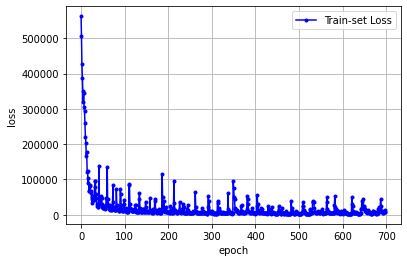

In [67]:
import matplotlib.pyplot as plt

# y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss[1:]))
# plt.plot(x_len, y_vloss[1:], marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss[1:], marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [68]:
group_x_test, group_y_test = make_dataset(x_test, y_test, 17)

In [69]:
y_pred = model.predict(group_x_test)

In [70]:
group_x_test.shape

(187, 17, 43)

In [71]:
y_pred.shape

(187, 1)

In [72]:
y_pred

array([[3781.0535],
       [3684.0293],
       [3753.3777],
       [3784.997 ],
       [3750.1255],
       [3747.4912],
       [3578.0022],
       [3799.566 ],
       [3744.254 ],
       [3707.3872],
       [3791.1042],
       [3764.1797],
       [3690.8188],
       [3733.7153],
       [3761.4373],
       [3595.9905],
       [3605.6335],
       [3408.1443],
       [3615.1252],
       [3658.766 ],
       [3817.6597],
       [3717.5474],
       [3755.124 ],
       [3281.3984],
       [3709.9048],
       [3722.4265],
       [3385.8696],
       [3697.0645],
       [3743.7356],
       [3768.0234],
       [3079.1145],
       [3723.8984],
       [3530.8357],
       [3482.369 ],
       [2659.558 ],
       [3059.1145],
       [2975.5295],
       [2822.2524],
       [3148.322 ],
       [3155.52  ],
       [3140.982 ],
       [2823.3713],
       [3121.6836],
       [2914.4438],
       [2585.5447],
       [3042.6936],
       [3123.8943],
       [2883.7576],
       [2752.1367],
       [2729.3105],


In [73]:
mean_pred = []
for i in range(0, len(y_pred), 17):
  mean = np.mean(y_pred[i:i+17])
  mean_pred.append(mean)
mean_pred

[3721.951,
 3593.9417,
 2920.9402,
 2476.3325,
 2639.9705,
 2668.0554,
 2775.4536,
 3024.4478,
 3581.5476,
 3322.0706,
 3108.6218]

In [74]:
group_y_test

array([2688, 2688, 2688, 2688, 2688, 2688, 2688, 2688, 2688, 2688, 2688,
       2688, 2688, 2688, 2688, 2688, 2688, 2420, 2420, 2420, 2420, 2420,
       2420, 2420, 2420, 2420, 2420, 2420, 2420, 2420, 2420, 2420, 2420,
       2420, 2094, 2094, 2094, 2094, 2094, 2094, 2094, 2094, 2094, 2094,
       2094, 2094, 2094, 2094, 2094, 2094, 2094, 1969, 1969, 1969, 1969,
       1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969,
       1969, 1969, 2652, 2652, 2652, 2652, 2652, 2652, 2652, 2652, 2652,
       2652, 2652, 2652, 2652, 2652, 2652, 2652, 2652, 2641, 2641, 2641,
       2641, 2641, 2641, 2641, 2641, 2641, 2641, 2641, 2641, 2641, 2641,
       2641, 2641, 2641, 3045, 3045, 3045, 3045, 3045, 3045, 3045, 3045,
       3045, 3045, 3045, 3045, 3045, 3045, 3045, 3045, 3045, 3327, 3327,
       3327, 3327, 3327, 3327, 3327, 3327, 3327, 3327, 3327, 3327, 3327,
       3327, 3327, 3327, 3327, 3349, 3349, 3349, 3349, 3349, 3349, 3349,
       3349, 3349, 3349, 3349, 3349, 3349, 3349, 33

In [76]:
y_test_unique = np.unique(group_y_test)

In [77]:
group_y_test.shape

(187,)

In [78]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_unique, mean_pred))
rmse

735.4254459249338

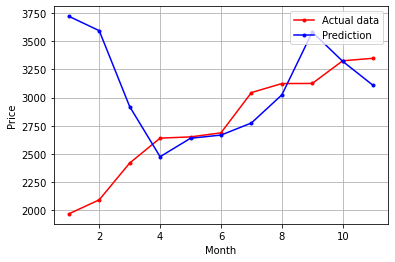

In [79]:
import matplotlib.pyplot as plt


x_len = np.arange(1, len(y_test_unique)+1)
plt.plot(x_len, y_test_unique, marker='.', c='red', label="Actual data")
plt.plot(x_len, mean_pred, marker='.', c='blue', label="Prediction")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()